<a href="https://colab.research.google.com/github/CarmoDuds/GW170817/blob/main/1.%20Time_series%2C%20FFT%20e%20ASD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Instalação das Bibliotecas

In [2]:
!pip install --upgrade gwpy

import gwpy

from gwosc.datasets import event_gps
from gwpy.timeseries import TimeSeries
from scipy.signal import get_window
import matplotlib.pyplot as plt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 20.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.7/295.7 kB 21.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.6/128.6 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 62.6 MB/s eta 0:00:00
  Attempting uninstall: cryptography
    Found existing installation: cryptography 43.0.3
    Uninstalling cryptography-43.0.3:
      Successfully uninstalled cryptography-43.0.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pydrive2 1.21.3 requires cryptography<44, but you have cryptography 45.0.4 which is incompatible.
pyopenssl 24.2.1 requires cryptography<44,>=41.0.5, but you have cryptography 45.0.4 which is incompatible.


# Data Import

Importa as séries temporais dos três interferômetros em um intervalo de tempo definido em torno do evento GW170817.

In [8]:
# Encontrar tempo GPS de um evento específico (tempo em segundos, onde o 0 do tempo GPS em 00:00 de 6 de janeiro de 1980)

gps = event_gps('GW170817')
start = gps - 512
end = gps + 512
print(gps)

1187008882.4


In [11]:
Ldata = TimeSeries.fetch_open_data('L1', int(start), int(end), verbose=True) # Dados do LIGO - Livingston
Hdata = TimeSeries.fetch_open_data('H1', int(start), int(end), verbose=True) # LIGO - Hanford
Vdata = TimeSeries.fetch_open_data('V1', start, end, verbose=True) # VIRGO

Fetched 1 URLs from gwosc.org for [1187008881 .. 1187008882))
Reading data... [Done]
Fetched 1 URLs from gwosc.org for [1187008881 .. 1187008882))
Reading data... [Done]
Fetched 1 URLs from gwosc.org for [1187008881 .. 1187008883))
Reading data... [Done]


# Plot Strain Adimensional

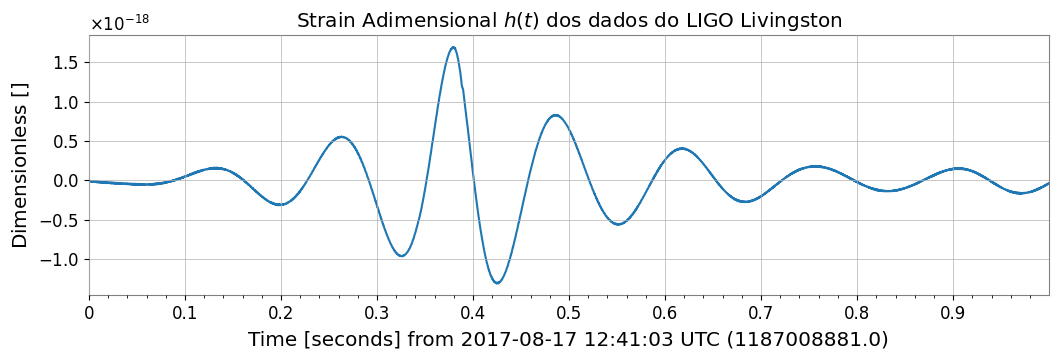

In [12]:
# LIGO Livingston

plot = Ldata.plot()
plt.title('Strain Adimensional $h(t)$ dos dados do LIGO Livingston')
plot.show()

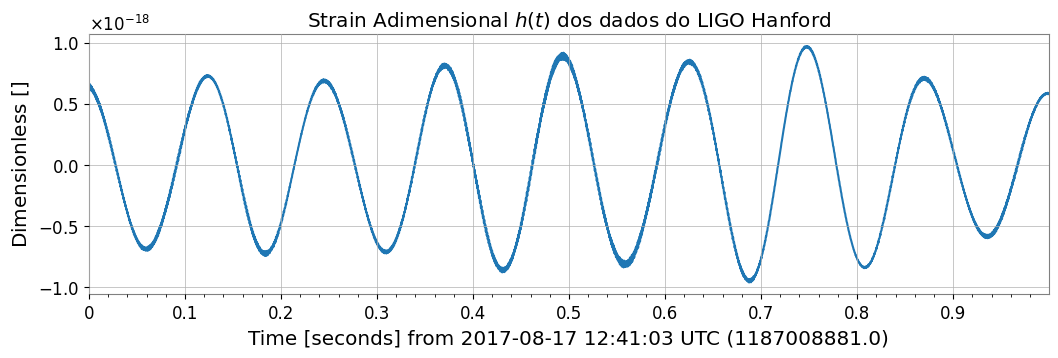

In [13]:
# LIGO Hanford

plot = Hdata.plot()
plt.title('Strain Adimensional $h(t)$ dos dados do LIGO Hanford')
plot.show()

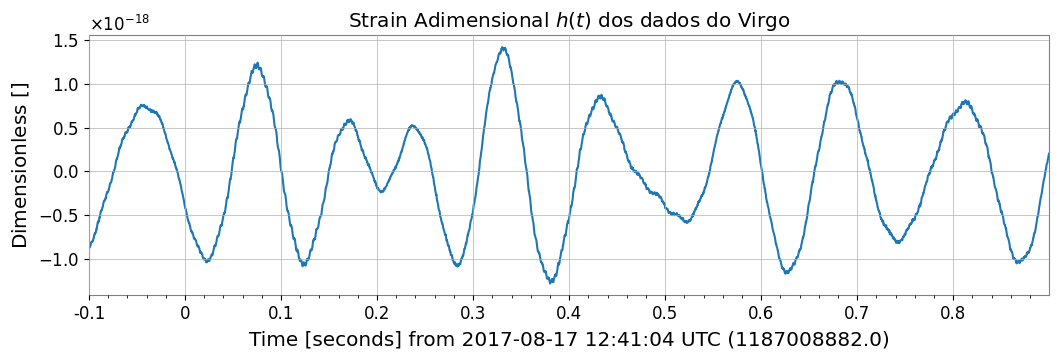

In [7]:
# Virgo

plot = Vdata.plot()
plt.title('Strain Adimensional $h(t)$ dos dados do Virgo')
plot.show()






































































































































































































































































# Fast Fourier Transform

In [ ]:
Lfft = Ldata.fft() # LIGO - Livingston
Hfft = Hdata.fft() # LIGO - Hanford
Vfft = Vdata.fft() # Virgo

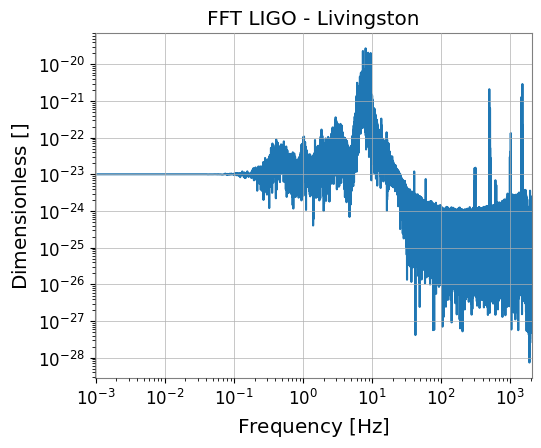

In [ ]:
plot = Lfft.abs().plot(xscale="log", yscale="log")
plt.title('FFT LIGO - Livingston')
plot.show()

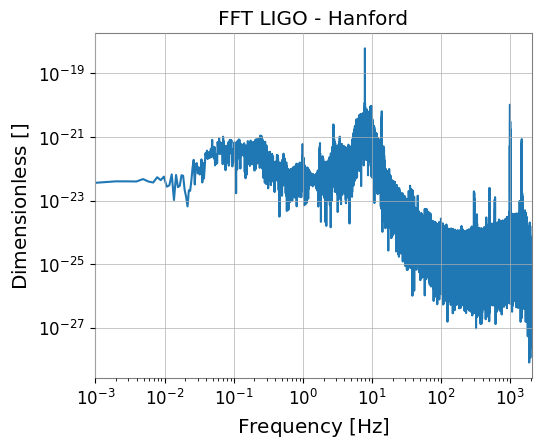

In [ ]:
plot = Hfft.abs().plot(xscale="log", yscale="log")
plt.title('FFT LIGO - Hanford')
plot.show()

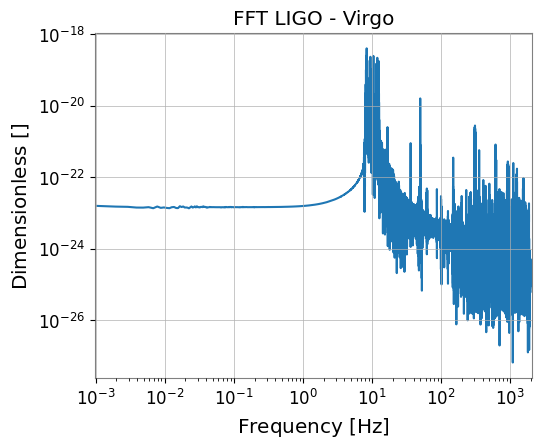

In [ ]:
plot = Vfft.abs().plot(xscale="log", yscale="log")
plt.title('FFT LIGO - Virgo')
plot.show()

# Janela de Hann

In [ ]:
# Criar a janela de Hann
window = get_window("hann" , Ldata.size) #len(Ldata)=len(Vdata)=len(Hdata)

# Aplicar a janela de Hann nos dados
LHann = Ldata*window
VHann = Vdata*window
HHann = Hdata*window

# Aplicar a FFT nos dados janelados
fft_LHann = LHann.fft().abs()
fft_VHann = VHann.fft().abs()
fft_HHann = HHann.fft().abs()


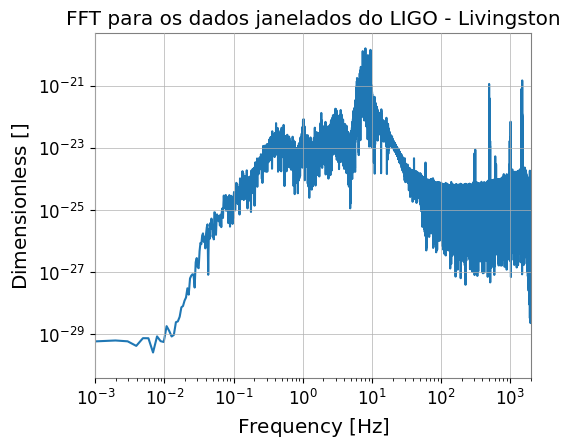

In [ ]:
plotfft_LHann = fft_LHann.abs().plot(xscale="log", yscale="log")
plt.title('FFT para os dados janelados do LIGO - Livingston')
plotfft_LHann.show()

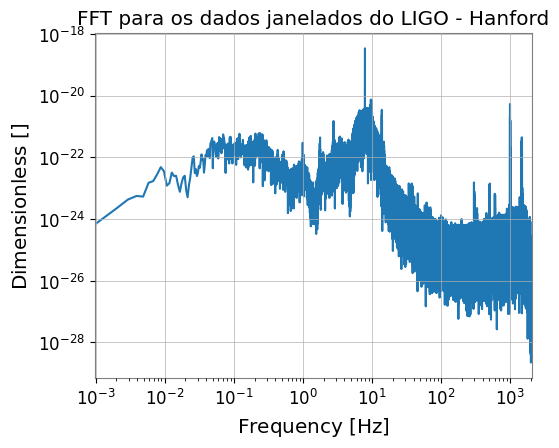

In [ ]:
plotfft_HHann = fft_HHann.abs().plot(xscale="log", yscale="log")
plt.title('FFT para os dados janelados do LIGO - Hanford')
plotfft_HHann.show()

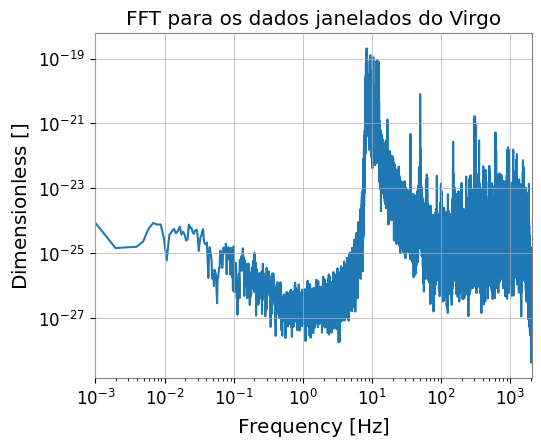

In [ ]:
plotfft_VHann = fft_VHann.abs().plot(xscale="log", yscale="log")
plt.title('FFT para os dados janelados do Virgo')
plotfft_VHann.show()

# ASD

In [ ]:
# ASD (Amplitude Spectral Density)

Lasd = Ldata.asd(fftlength=4, method="welch") #existe o metodo median tambem
Vasd = Vdata.asd(fftlength=4, method="welch")
Hasd = Hdata.asd(fftlength=4, method="welch")


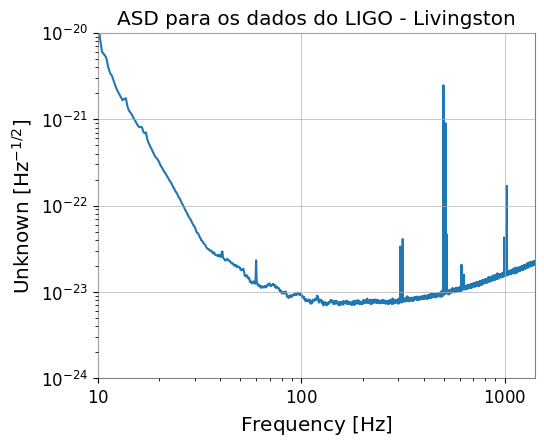

In [ ]:
plot_Lasd = Lasd.plot()
ax = plot_Lasd.gca()
ax.set(xlim =(10, 1400), ylim=(1e-24, 1e-20)) # Por que esse range em y?
plt.title('ASD para os dados do LIGO - Livingston')
plot_Lasd.show(warn=False)

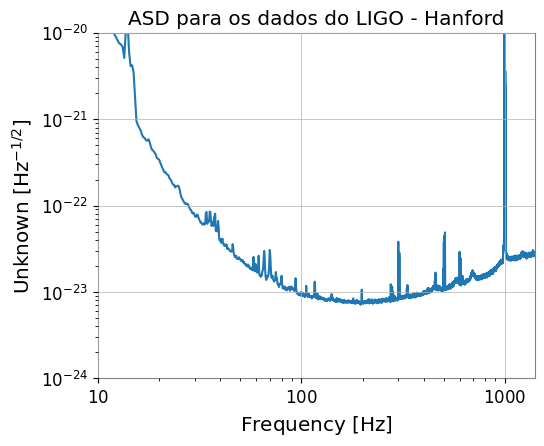

In [ ]:
plot_Hasd = Hasd.plot()
ax = plot_Hasd.gca()
ax.set(xlim =(10, 1400), ylim=(1e-24, 1e-20)) # Por que esse range em y?
plt.title('ASD para os dados do LIGO - Hanford')
plot_Hasd.show(warn=False)

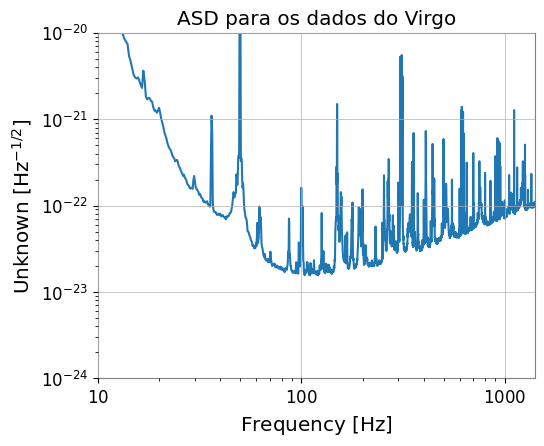

In [ ]:
plot_Vasd = Vasd.plot()
ax = plot_Vasd.gca()
ax.set(xlim =(10, 1400), ylim=(1e-24, 1e-20)) # Por que esse range em y?
plt.title('ASD para os dados do Virgo')
plot_Vasd.show(warn=False)

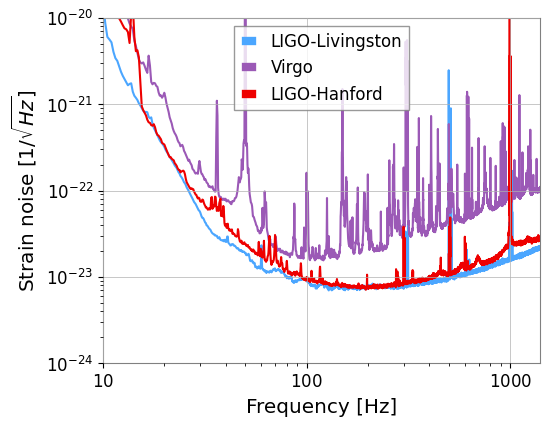

In [ ]:

plot = Lasd.plot()
ax = plot.gca()

ax.set(xlim=(10,1400),ylim=(1e-24,1e-20))

ax.plot(Vasd, label='Virgo',color='gwpy:virgo')
ax.plot(Hasd, label='LIGO-Hanford',color='gwpy:ligo-hanford')

lline = ax.lines[0]
lline.set_color('gwpy:ligo-livingston')
lline.set_label('LIGO-Livingston')

ax.set_ylabel(r'Strain noise [$1/\sqrt{Hz}$]')
ax.set_xlabel('Frequency [Hz]')
ax.legend()
plot.show()




In [ ]:
# Revisar ASD Livingston